In [22]:
import pandas as pd
import warnings

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
import numpy as np
warnings.filterwarnings('ignore')
from pandas_profiling import ProfileReport

In [2]:
df=pd.read_csv('datatraining.txt')
df.drop(['date','Humidity'],axis=1,inplace=True)

In [3]:
train=df[:int(len(df)*0.8)]
test=df[int(len(df)*0.8):]

In [4]:
#Finding Actual Occupancy Stats on TEST DATA

In [5]:
test['Occupancy'].value_counts()

0    1041
1     588
Name: Occupancy, dtype: int64

In [6]:
#Our Model

In [7]:
Pred_VAR=pd.read_csv('pred_final.txt')

In [9]:
Pred_VAR.drop('Unnamed: 0',axis=1,inplace=True)

In [10]:
Pred_VAR.index = np.arange(6516, 6516+len(Pred_VAR))

In [11]:
profile = ProfileReport(Pred_VAR, title="Pandas Profiling Report")

In [12]:
profile.to_file("VAR_Pred_Report.html")

In [13]:
#Visual Aid

In [14]:
train.drop('Occupancy',axis=1,inplace=True)
test.drop('Occupancy',axis=1,inplace=True)

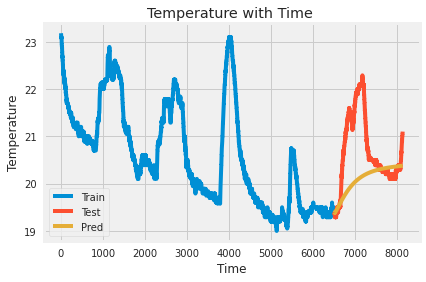

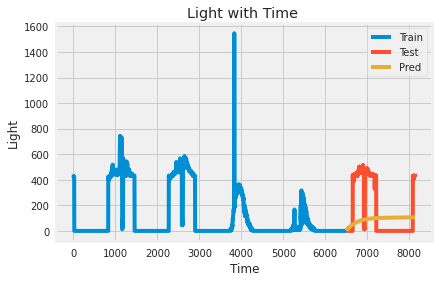

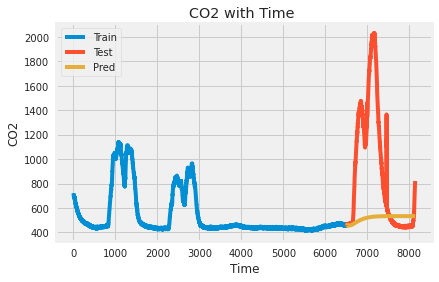

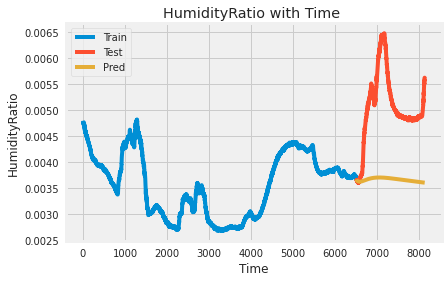

In [23]:
for i in train.columns:
    plt.title("{} with Time ".format(i))
    plt.xlabel("Time")
    plt.ylabel(i)
    train[i].iloc[:].plot(label="Train")
    test[i].iloc[:].plot(label="Test")
    Pred_VAR[i].iloc[:].plot(label="Pred")
    plt.legend()
    plt.show()

In [18]:
#Making Classication On the Model

In [20]:
import pickle
model = pickle.load(open('classifier.pkl', 'rb'))
y_pred=model.predict(Pred_VAR)

In [21]:
print("The No. of correct classication of occupancy by the model is {} /588 ".format((y_pred==1).sum()))
print("The No. of correct classication of inoccupancy by the model is {} /1041 ".format((y_pred==0).sum()))

The No. of correct classication of occupancy by the model is 0 /588 
The No. of correct classication of inoccupancy by the model is 1629 /1041 


In [17]:
#Though The RMSE Scores seem to be pretty good as compared to LSTM's it does not generalize very well